**1.two_layer_net.py를 불러오시오.**

In [1]:
import sys, os
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.

import numpy as np
from ch05.two_layer_net import TwoLayerNet

**(i) 입력층, 은닉층, 출력층의 뉴런의 개수가 모두 각각 3개인 얕은 신경망을 만들고 싶다. 본인 이름의 이니셜을 따서 인스턴스를 만드시오.**

In [2]:
HKH = TwoLayerNet(3,3,3)

**(ii) 두 개의 데이터 $[1,2,3]$, $[4,5,6]$을 배치처리를 통해 점수(score)를 구하는 코드를 쓰시오.**

In [3]:
x = np.array([[1,2,3],[4,5,6]])
print(HKH.predict(x))

[[0. 0. 0.]
 [0. 0. 0.]]


**(iii) 각 라벨이 $[1,0,0]$, $[0,0,1]$일 때, 배치처리를 통해 손실함수값을 구하는 코드를 쓰시오.**

In [4]:
t= np.array([[1,0,0],[0,0,1]])
print(HKH.loss(x,t))

1.0986122886681098


**(iv) 학습율(learning rate)을 0.1로 경사하강법을 적용해서 한걸음 내려간후의 첫번째 가중치 행렬을 출력하는 코드를 쓰시오.**

In [5]:
grads = HKH.gradient(x,t)
print(HKH.params['W1'] - 0.1*grads['W1'])

[[ 3.96040749e-05  1.45826525e-02 -7.07785076e-03]
 [-8.67104421e-03  2.26242391e-03 -9.45740567e-03]
 [ 2.06692610e-03 -1.62721146e-02  6.81135959e-03]]


**2. 다음 코드를 실행했을때 출력될 대략적인 값을 순서대로 쓰고 이유를 설명하시오.**

첫번째 가중치 행렬은 평균 0, 표준편차 0.1인 정규분포를 따라 10,000개의 숫자를 랜덤하게 뽑아 만든 100$\times$100 행렬입니다.  
첫번째 가중치 행렬의 분산은
$$
0.1^2 = {1 \over 100 \times 100} \sum_{i,j} (w_{i,j}-0)^2
$$
이므로
$$
\sum_{i,j} w_{i,j}^2 \sim 100
$$
입니다.  
두번째 가중치 행렬은 평균 0, 표준편차 0.1인 정규분포를 따라 1,000개의 숫자를 랜덤하게 뽑아 만든 100$\times$10 행렬입니다.  
두번째 가중치 행렬의 분산은
$$
0.1^2 = {1 \over 100 \times 10} \sum_{i,j} (w_{i,j}-0)^2
$$
이므로
$$
\sum_{i,j} w_{i,j}^2 \sim 10
$$
입니다.  
랜덤니스 때문에 실행할때마다 매번 다른 약간의 오차가 발생합니다.

In [6]:
network = TwoLayerNet(100,100,10,0.1)

print(np.sum(network.params['W1']**2))
print(np.sum(network.params['W2']**2))

99.5142212760957
10.714915405675026


**3. 활성화 함수가 sigmoid인 이층 신경망이 dictionary
$$
\{W_1 : \begin{bmatrix} \log 2&\log 2&0 \\ \log 2&0&\log 2 \end{bmatrix},~
b_1 : [0,0,0],~
W_2 : \begin{bmatrix} 9&0 \\ 0&5 \\ 0&6 \end{bmatrix},~
b_2 : [0,0]
\}
$$
로 주어져 있다.**

**(i) 입력된 데이터는 $[2,1]$이고 라벨이 $[1,0]$일 때, 미분
$$
{\partial L \over \partial W_1}, \qquad {\partial L \over \partial b_1}, \qquad {\partial L \over \partial W_2}, \qquad {\partial L \over \partial b_2}
$$
을 구하시오.**

역전파를 하기위해서는 순전파가 선행되어야 합니다.
순전파의 계산 결과를 역전파때 사용하기 때문입니다.
데이터 $x_1=[2,1]$이 첫번째 Affine층을 통과하면
$$
x_1 W_1 +b_1=
\begin{pmatrix}2&1\end{pmatrix}
\begin{pmatrix} \log 2&\log 2&0 \\ \log 2&0&\log 2 \end{pmatrix} =
\begin{pmatrix}\log8&\log4&\log2\end{pmatrix}
$$
이 됩니다.
시그모이드 층을 통과하면
$$
x_2 =
[{1 \over 1+e^{-\log8}}, {1 \over 1+e^{-\log4}}, {1 \over 1+e^{-\log2}}] =
[{8 \over 9}, {4 \over 5}, {2 \over 3}]
$$
가 됩니다.
두번째 Affine층을 통과시키면 스코어
$$
s=x_2 W_2 +b_2=
\begin{pmatrix}{8 \over 9}& {4 \over 5}& {2 \over 3}\end{pmatrix}
\begin{pmatrix}9&0\\0&5\\0&6\end{pmatrix} =
\begin{pmatrix}8&8\end{pmatrix}
$$
를 얻습니다.
소프트맥스 변환을 하면 확률분포
$$
y = [{1 \over 2}, {1 \over 2}]
$$
를 얻습니다.

다음은 역전파를 진행하겠습니다.
순서는 순전파와 정반대 순으로 진행합니다.
마지막층부터 시작합니다.
SoftmaxWithLoss층의 역전파 공식은 신경망이 예측한 확률 벡터 빼기 라벨을 원핫인코딩한 확률벡터이므로 SoftmaxWithLoss층은 미분
$$
{\partial L \over \partial s} = y - t = [{1 \over 2}, {1 \over 2}] - [1,0] =  [-{1 \over 2}, {1 \over 2}]
$$
를 밑으로 흘려보냅니다.
이것을 두번째 Affine층이 받습니다.
계산 그래프
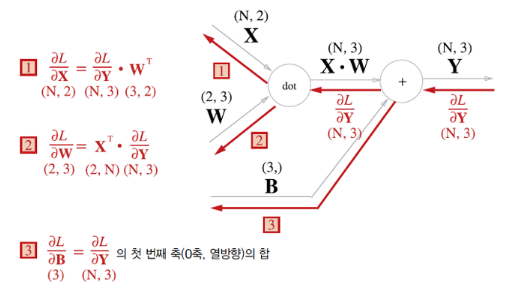
를 통해 미분
$$
\begin{aligned}
{\partial L \over \partial b_2} &= {\partial L \over \partial s} =  [-{1 \over 2}, {1 \over 2}] \\
{\partial L \over \partial W_2} &= x_2^T {\partial L \over \partial s} =
\begin{pmatrix}{8 \over 9} \\ {4 \over 5} \\ {2 \over 3}\end{pmatrix}
\begin{pmatrix} -{1 \over 2} & {1 \over 2} \end{pmatrix} = 
\begin{pmatrix}-{4 \over 9}&{4 \over 9} \\ -{2 \over 5}&{2 \over 5} \\ -{1 \over 3}&{1 \over 3}\end{pmatrix} \\
{\partial L \over \partial x_2} &= {\partial L \over \partial s} W_2^T =
\begin{pmatrix} -{1 \over 2} & {1 \over 2} \end{pmatrix}
\begin{pmatrix} 9&0&0 \\ 0&5&6 \end{pmatrix} =
\begin{pmatrix} -{9 \over 2}&{5 \over 2}&3 \end{pmatrix}
\end{aligned}
$$
을 계산합니다.
${\partial L \over \partial b_2}$와 ${\partial L \over \partial W_2}$는 두번째 Affine층 학습을 위해 사용되고 ${\partial L \over \partial x_2}$는 아래층으로 흘러갑니다.

이것을 시그모이드층이 받습니다.
시그모이드층은 학습해야할 파라미터가 없으므로 밑으로 흘려보낼 미분만 구하면 됩니다.
윗층에서 흘러들어온 미분에 시그모이드 함수 미분 공식을 곱하면 밑으로 흘려보낼 미분
$$
{\partial L \over \partial x_2} * x_2 * (1-x_2) = [ -{9 \over 2} \times {8 \over 9} \times {1 \over 9}, {5 \over 2}\times {4 \over 5}\times {1 \over 5},3 \times {2 \over 3} \times {1 \over 3} ] =
[ -{4 \over 9},{2 \over 5},{2 \over 3}]
$$
을 구할수 있습니다.

이것을 첫번째 Affine층에서 받습니다.
역시 계산그래프로 미분
$$
\begin{aligned}
{\partial L \over \partial b_1} &= [ -{4 \over 9},{2 \over 5},{2 \over 3}] \\
{\partial L \over \partial W_1} &= \begin{pmatrix}2 \\ 1\end{pmatrix}
\begin{pmatrix} -{4 \over 9} & {2 \over 5} & {2 \over 3} \end{pmatrix} = 
\begin{pmatrix} -{8 \over 9} & {4 \over 5} & {4 \over 3} \\  -{4 \over 9} & {2 \over 5} & {2 \over 3}\end{pmatrix}
\end{aligned}
$$
을 구합니다.
아래층이 없기 때문에 ${\partial L \over \partial x_1}$는 굳이 구할 필요가 없겠죠.

**(ii) Affine, Relu, SoftmaxWithLoss 클래스로 검산하시오.**

In [7]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [8]:
W1 = np.array([[np.log(2),np.log(2),0],[np.log(2),0,np.log(2)]])
b1 = np.zeros(3)
W2 = np.array([[9,0],[0,5],[0,6]])
b2 = np.zeros(2)

affine1 = Affine(W1,b1)
affine2 = Affine(W2,b2)
sigmoid = Sigmoid()
softmaxwithloss = SoftmaxWithLoss()

x1 = np.array([[2,1]])
t = np.array([[1,0]])

y1 = affine1.forward(x1)
x2 = sigmoid.forward(y1)
y2 = affine2.forward(x2)
loss = softmaxwithloss.forward(y2,t)

dy2 = softmaxwithloss.backward()
dx2 = affine2.backward(dy2)
dy1 = sigmoid.backward(dx2)
dx1 = affine1.backward(dy1)

print("첫번째 Affine층 가중치행렬에 대한 미분 :\n"+str(affine1.dW))
print("="*40)
print("첫번째 Affine층 편향벡터에 대한 미분 :\n"+str(affine1.db))
print("="*40)
print("두번째 Affine층 가중치행렬에 대한 미분 :\n"+str(affine2.dW))
print("="*40)
print("두번째 Affine층 편향벡터에 대한 미분 :\n"+str(affine2.db))

첫번째 Affine층 가중치행렬에 대한 미분 :
[[-0.88888889  0.8         1.33333333]
 [-0.44444444  0.4         0.66666667]]
첫번째 Affine층 편향벡터에 대한 미분 :
[-0.44444444  0.4         0.66666667]
두번째 Affine층 가중치행렬에 대한 미분 :
[[-0.44444444  0.44444444]
 [-0.4         0.4       ]
 [-0.33333333  0.33333333]]
두번째 Affine층 편향벡터에 대한 미분 :
[-0.5  0.5]


**(iii) 학습률 1로 한번 학습하고 나면 가중치 행렬 $W_1, W_2$와 편향 벡터 $b_1, b_2$가 어떻게 업데이트 되겠는가?**

경사하강법으로 파라미터들을
$$
\begin{aligned}
W_1- \eta {\partial L \over \partial W_1} &= \begin{pmatrix} \log 2&\log 2&0 \\ \log 2&0&\log 2 \end{pmatrix}
- \begin{pmatrix} -{8 \over 9} & {4 \over 5} & {4 \over 3} \\  -{4 \over 9} & {2 \over 5} & {2 \over 3}\end{pmatrix} =
\begin{pmatrix} \log 2 + {8 \over 9}&\log 2 - {4 \over 5}&-{4 \over 3} \\ \log 2 + {4 \over 9}&-{2 \over 5}&\log 2 - {2 \over 3}\end{pmatrix} \\
b_1-{\partial L \over \partial b_1} &= (0,0,0) - (-{4 \over 9},{2 \over 5},{2 \over 3}) = ({4 \over 9},-{2 \over 5},-{2 \over 3}) \\
W_2- \eta {\partial L \over \partial W_2} &= \begin{pmatrix} 9&0 \\ 0&5 \\ 0&6 \end{pmatrix}
- \begin{pmatrix} -{4 \over 9}&{4 \over 9} \\ -{2 \over 5}&{2 \over 5} \\ -{1 \over 3}&{1 \over 3}\end{pmatrix} =
\begin{pmatrix} {85 \over 9}&-{4 \over 9} \\ {2 \over 5}&{23 \over 5} \\ {1 \over 3}&{17 \over 3}\end{pmatrix} \\
b_2-{\partial L \over \partial b_2} &= (0,0) - (-{1 \over 2},{1 \over 2}) = ({1 \over 2},-{1 \over 2})
\end{aligned}
$$
와 같이 업데이트합니다.

여태까지 토이 예제로 생각한 신경망에서 데이터 입력$\rightarrow$순전파$\rightarrow$역전파$\rightarrow$파라미터 업데이트 과정을 직접 손으로 계산해봤습니다.
의미있는 예제에서는 가중치행렬과 편향벡터가 매우 크고 위 작업을 여러번 반복합니다.
컴퓨팅 파워가 필수적이지요.
MNIST정도의 데이터를 학습시키는데에는 Keras와 같은 프레임워크를 사용하면 코드 몇줄로 가능할 정도로 쉽습니다.
하지만 Keras 학습 게이지가 올라가는동안 실제로 컴퓨터가 무엇을 계산하는지 이해하는 것은 다른 문제입니다.
실제로 컴퓨터가 하는 작업은 데이터 입력$\rightarrow$순전파$\rightarrow$역전파$\rightarrow$파라미터 업데이트를 거대행렬에서 여러번 반복하는 것입니다.
이 과정을 의인화해서 붙인 이름이 **머신러닝**입니다.
왜냐하면 밖에서 봤을때는 데이터를 입력했더니 신경망이 더 똑똑해지는것이 사람이 공부를 하거나 경험을 해서 더 똑똑해지는 것처럼 느껴지기 때문입니다.
하지만 원리를 이해하면 이는 수학적인 과정이고 인공신경망은 계산기중의 하나입니다.

**4. 활성화 함수가 ReLU인 이층 신경망이 dictionary
$$
\{W_1 : \begin{bmatrix} 0&0&0&0&1 \\ 1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{bmatrix},~
b_1 : [0,0,0,0,0],~
W_2 : \begin{bmatrix} 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ -5&5&5&5&-5 \end{bmatrix},~
b_2 : [0,0,0,0,0]
\}
$$
로 주어져 있다.**

**(i) 입력된 데이터는 $[1,2,3,4,5]$이고 라벨이 $[1,0,0,0,0]$일 때, 미분
$$
{\partial L \over \partial W_1}, \qquad {\partial L \over \partial b_1}, \qquad {\partial L \over \partial W_2}, \qquad {\partial L \over \partial b_2}
$$
을 구하시오.**

역전파를 하기위해서는 순전파가 선행되어야 합니다.
순전파의 계산 결과를 역전파때 사용하기 때문입니다.
데이터 $x_1=[1,2,3,4,5]$이 첫번째 Affine층을 통과하면
$$
x_1 W_1 +b_1=
\begin{pmatrix}1&2&3&4&5\end{pmatrix}
\begin{pmatrix} 0&0&0&0&1 \\ 1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{pmatrix} =
\begin{pmatrix}2&-3&-4&-5&1\end{pmatrix}
$$
이 됩니다.
ReLu층은 음수를 죽여서
$$
x_2 = [2,0,0,0,1]
$$
로 만듭니다.
여기서 죽는 위치는 나중에 역전파에서 사용됩니다.
두번째 Affine층을 통과시키면 스코어
$$
s=x_2 W_2 +b_2=
\begin{pmatrix}2&0&0&0&1\end{pmatrix}
\begin{pmatrix}5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ -5&5&5&5&-5\end{pmatrix} =
\begin{pmatrix}5&5&5&5&5\end{pmatrix}
$$
를 얻습니다.
소프트맥스 변환을 하면 확률분포
$$
y = [{1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}]
$$
를 얻습니다.

다음은 역전파를 진행하겠습니다.
순서는 순전파와 정반대 순으로 진행합니다.
마지막층부터 시작합니다.
SoftmaxWithLoss층의 역전파 공식은 신경망이 예측한 확률 벡터 빼기 라벨을 원핫인코딩한 확률벡터이므로 SoftmaxWithLoss층은 미분
$$
{\partial L \over \partial s} = y - t = [{1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}] - [1,0,0,0,0] =  [-{4 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}]
$$
을 밑으로 흘려보냅니다.
이것을 두번째 Affine층이 받습니다.
계산 그래프를 통해 미분
$$
\begin{aligned}
{\partial L \over \partial b_2} &= {\partial L \over \partial s} =  [-{4 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}, {1 \over 5}] \\
{\partial L \over \partial W_2} &= x_2^T {\partial L \over \partial s} =
\begin{pmatrix}2 \\ 0 \\ 0 \\ 0 \\ 1\end{pmatrix}
\begin{pmatrix} -{4 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5} \end{pmatrix} = 
\begin{pmatrix}-{8 \over 5}&{2 \over 5}&{2 \over 5}&{2 \over 5}&{2 \over 5} \\ 0&0&0&0&0 \\ 0&0&0&0&0 \\ 0&0&0&0&0 \\  -{4 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5} \end{pmatrix} \\
{\partial L \over \partial x_2} &= {\partial L \over \partial s} W_2^T =
\begin{pmatrix} -{4 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5} \end{pmatrix}
\begin{pmatrix} 5&5&5&5&-5 \\ 0&0&0&0&5 \\ 0&0&0&0&5 \\ 0&0&0&0&5 \\ 5&5&5&5&-5 \end{pmatrix} =
\begin{pmatrix} -3&-3&-3&-3&6 \end{pmatrix}
\end{aligned}
$$
을 계산합니다.
${\partial L \over \partial b_2}$와 ${\partial L \over \partial W_2}$는 두번째 Affine층 학습을 위해 사용되고 ${\partial L \over \partial x_2}$는 아래층으로 흘러갑니다.

이것을 ReLu층이 받습니다.
ReLu층은 학습해야할 파라미터가 없으므로 밑으로 흘려보낼 미분만 구하면 됩니다.
윗층에서 흘러들어온 미분에서 순전파에서 죽였던 자리를 죽이면  밑으로 흘려보낼 미분
$$
[-3,0,0,0,6]
$$
을 구할수 있습니다.

이것을 첫번째 Affine층에서 받습니다.
역시 계산그래프로 미분
$$
\begin{aligned}
{\partial L \over \partial b_1} &= [-3,0,0,0,6] \\
{\partial L \over \partial W_1} &= \begin{pmatrix}1\\2\\3\\4\\5\end{pmatrix}
\begin{pmatrix} -3&0&0&0&6 \end{pmatrix} = 
\begin{pmatrix} -3&0&0&0&6 \\  -6&0&0&0&12 \\ -9&0&0&0&18 \\ -12&0&0&0&24 \\ -15&0&0&0&30 \end{pmatrix}
\end{aligned}
$$
을 구합니다.
아래층이 없기 때문에 ${\partial L \over \partial x_1}$는 굳이 구할 필요가 없겠죠.

**(ii) Affine, Relu, SoftmaxWithLoss 클래스로 검산하시오.**

In [9]:
from common.layers import Relu

In [10]:
W1 = np.array([[0,0,0,0,1],[1,0,0,0,0],[0,-1,0,0,0],[0,0,-1,0,0],[0,0,0,-1,0]])
b1 = np.zeros(5)
W2 = np.array([[5,0,0,0,5],[5,0,0,0,5],[5,0,0,0,5],[5,0,0,0,5],[-5,5,5,5,-5]])
b2 = np.zeros(5)

affine1 = Affine(W1,b1)
affine2 = Affine(W2,b2)
relu = Relu()
softmaxwithloss = SoftmaxWithLoss()

x1 = np.array([[1,2,3,4,5]])
t = np.array([[1,0,0,0,0]])

y1 = affine1.forward(x1)
x2 = relu.forward(y1)
y2 = affine2.forward(x2)
loss = softmaxwithloss.forward(y2,t)

dy2 = softmaxwithloss.backward()
dx2 = affine2.backward(dy2)
dy1 = relu.backward(dx2)
dx1 = affine1.backward(dy1)

print("첫번째 Affine층 가중치행렬에 대한 미분 :\n"+str(affine1.dW))
print("="*40)
print("첫번째 Affine층 편향벡터에 대한 미분 :\n"+str(affine1.db))
print("="*40)
print("두번째 Affine층 가중치행렬에 대한 미분 :\n"+str(affine2.dW))
print("="*40)
print("두번째 Affine층 편향벡터에 대한 미분 :\n"+str(affine2.db))

첫번째 Affine층 가중치행렬에 대한 미분 :
[[ -3.   0.   0.   0.   6.]
 [ -6.   0.   0.   0.  12.]
 [ -9.   0.   0.   0.  18.]
 [-12.   0.   0.   0.  24.]
 [-15.   0.   0.   0.  30.]]
첫번째 Affine층 편향벡터에 대한 미분 :
[-3.  0.  0.  0.  6.]
두번째 Affine층 가중치행렬에 대한 미분 :
[[-1.6  0.4  0.4  0.4  0.4]
 [-0.   0.   0.   0.   0. ]
 [-0.   0.   0.   0.   0. ]
 [-0.   0.   0.   0.   0. ]
 [-0.8  0.2  0.2  0.2  0.2]]
두번째 Affine층 편향벡터에 대한 미분 :
[-0.8  0.2  0.2  0.2  0.2]


**(iii) 학습률 1로 한번 학습하고 나면 가중치 행렬 $W_1, W_2$와 편향 벡터 $b_1, b_2$가 어떻게 업데이트 되겠는가?**

경사하강법으로 파라미터들을
$$
\begin{aligned}
W_1- \eta {\partial L \over \partial W_1} &= \begin{pmatrix} 0&0&0&0&1 \\ 1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{pmatrix}
- \begin{pmatrix}  -3&0&0&0&6 \\  -6&0&0&0&12 \\ -9&0&0&0&18 \\ -12&0&0&0&24 \\ -15&0&0&0&30 \end{pmatrix} =
\begin{pmatrix}  3&0&0&0&-5 \\  7&0&0&0&-12 \\ 9&-1&0&0&-18 \\ 12&0&-1&0&-24 \\ 15&0&0&-1&-30 \end{pmatrix} \\
b_1-{\partial L \over \partial b_1} &= (0,0,0,0,0) - (-3,0,0,0,6) = (3,0,0,0,-6) \\
W_2- \eta {\partial L \over \partial W_2} &= \begin{pmatrix} 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ -5&5&5&5&-5 \end{pmatrix}
- \begin{pmatrix}-{8 \over 5}&{2 \over 5}&{2 \over 5}&{2 \over 5}&{2 \over 5} \\ 0&0&0&0&0 \\ 0&0&0&0&0 \\ 0&0&0&0&0 \\  -{4 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5}& {1 \over 5} \end{pmatrix} =
\begin{pmatrix} {33 \over 5}&-{2 \over 5}&-{2 \over 5}&-{2 \over 5}&{23 \over 5} \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\ 5&0&0&0&5 \\  -{21 \over 5}& {24 \over 5}& {24 \over 5}& {24 \over 5}& -{26 \over 5} \end{pmatrix} \\
b_2-{\partial L \over \partial b_2} &= (0,0) - (-{4 \over 5},{1 \over 5},{1 \over 5},{1 \over 5},{1 \over 5}) = ({4 \over 5},-{1 \over 5},-{1 \over 5},-{1 \over 5},-{1 \over 5})
\end{aligned}
$$
와 같이 업데이트합니다.

**5. train_neuralnet.py를 수정하여 가중치 행렬을 평균 0, 표준편차 $\sigma$인 정규분포로 랜덤하게 설정한 후 학습을 시작하시오. 학습이 끝난 후 정확도를 측정하시오. ($\sigma=1,10,0$)**

학습시작전에 가중치행렬은 평균이 0인 정규분포를 따라 랜덤하게 항들을 선택해서 만듭니다.  
표준편차는 왠지 1로 잡을것 같은데 그렇지 않습니다.  
표준편차를 너무 작게 잡거나 크게 잡으면 이후 학습에 심각한 문제가 생깁니다.  
어떤 문제가 생기는지 실험으로 확인하는 문제입니다.  
교재 코드에서는 표준편차를 0.01로 잡았기 때문에 1,10은 더 넓게 퍼지도록 잡은 경우이고 0은 좁게 몰리도록 잡은 경우입니다.  
신경망 모델이나 학습과정의 요소가 아니라 단지 학습시작전에 가중치를 넓게 퍼지도록 잡을지 좁게 몰리도록 잡을지의 문제이기 때문에 예상밖의 현상입니다.  
최적의 표준편차는 뉴런 개수와 손실함수에 대해 이미 공식으로 알려져있습니다.  
딥러닝 II 6강에서 다룰 주제입니다.

In [11]:
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

weight_init_std = [1,10,0]

for sigma in weight_init_std:
    print("="*10+"표준편차 "+str(sigma)+"="*10)
    network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10, weight_init_std = sigma)

    iters_num = 10000
    train_size = x_train.shape[0]
    batch_size = 100
    learning_rate = 0.1

    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)

    for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # 기울기 계산
        #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
        grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)

        # 갱신
        for key in ('W1', 'b1', 'W2', 'b2'):
            network.params[key] -= learning_rate * grad[key]
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print(train_acc, test_acc)

==========표준편차 1==========
0.1188 0.1145
0.7812 0.7814
0.8096166666666667 0.8133
0.8385 0.8404
0.8476833333333333 0.8431
0.85485 0.8553
0.8627833333333333 0.8613
0.8801 0.88
0.8772833333333333 0.8738
0.8828666666666667 0.8866
0.8900166666666667 0.8846
0.8870166666666667 0.8843
0.8982666666666667 0.898
0.8977666666666667 0.898
0.88985 0.8924
0.9101666666666667 0.9075
0.9015833333333333 0.8987
==========표준편차 10==========


C:\/Users//HAN//Documents//Deep Learning from Scratch\common\functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


0.10486666666666666 0.1015
0.7050666666666666 0.7074
0.6451833333333333 0.6415
0.6549333333333334 0.6569
0.57625 0.5764
0.5658666666666666 0.561
0.55095 0.5555
0.5602666666666667 0.5569
0.5278 0.5266
0.5402166666666667 0.5334
0.5179833333333334 0.5135
0.47946666666666665 0.4757
0.5040666666666667 0.5026
0.46321666666666667 0.4662
0.46476666666666666 0.4568
0.484 0.4726
0.4971833333333333 0.4893
==========표준편차 0==========
0.09871666666666666 0.098
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135
0.11236666666666667 0.1135


**6.(i) 자료실에서 fashion_mnist.pkl 파일을 다운받은 후 불러와서 출력하시오.**

딕셔너리가 저장되어 있었네요.

In [12]:
import matplotlib.pyplot as plt
import pickle

with open('fashion_mnist.pkl','rb') as f:
    fashion_mnist = pickle.load(f)

print(fashion_mnist)

{'x_train': array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0,

**(ii) key들을 모두 출력하고 value들의 shape을 출력하시오.**

MNIST와 같은 형식이네요.  
교재 코드는 흑백이미지임에도 채널이 있어서 60000 $\times$ 1 $\times$ 28 $\times$ 28이었는데 여기서는 허당같은 채널은 없군요.

In [13]:
print(fashion_mnist.keys())

for data in fashion_mnist.values():
    print(data.shape)

dict_keys(['x_train', 't_train', 'x_test', 't_test'])
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**(iii) 첫번째 훈련 데이터를 다음과 같이 출력하시오.**
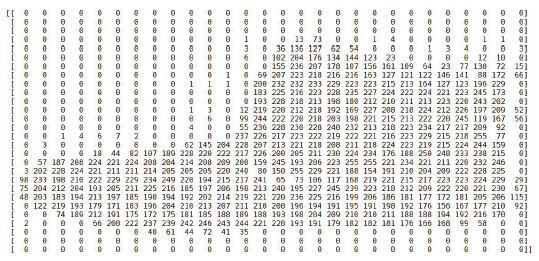

MNIST는 손글씨 5의 이미지 행렬이 출력됬는데 여기서는 신발모양의 이미지 행렬이 출력됬군요.  
줄넘김이나 생략을 하면 이미지 행렬의 모양새가 어그러지기 때문에 먼저 출력 설정을 해줍니다.

In [14]:
np.set_printoptions(linewidth=200,threshold=1000)

x_train = fashion_mnist['x_train']
t_train = fashion_mnist['t_train']
x_test = fashion_mnist['x_test']
t_test = fashion_mnist['t_test']


print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

**(iv) 훈련데이터 첫 25장의 이미지를 다음과 같이 출력하시오.**
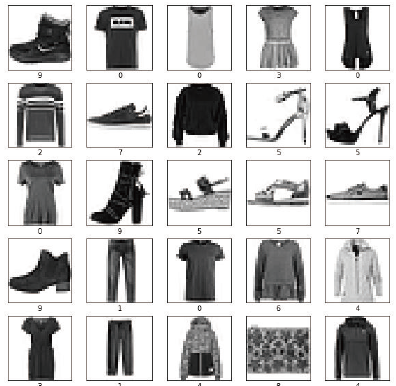

패션 아이템들의 이미지군요.  
Fashion-MNIST는 MNIST처럼 28$\times$28 해상도의 흑백이미지 데이터셋이 훈련용 60,000장, 테스트용 10,000장으로 구성되어 있습니다.  
0부터 9까지의 각 레벨은 다음과 같은 패션 아이템을 나타냅니다.
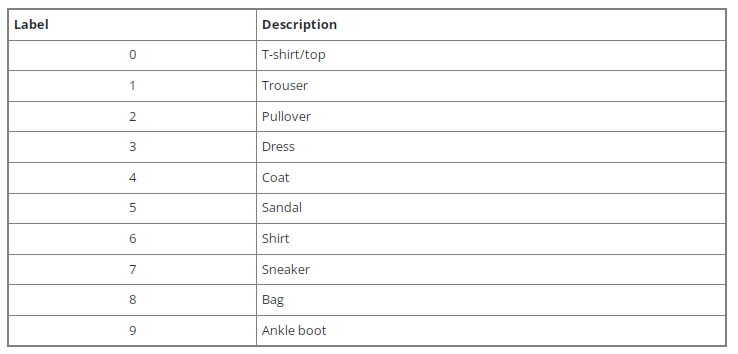

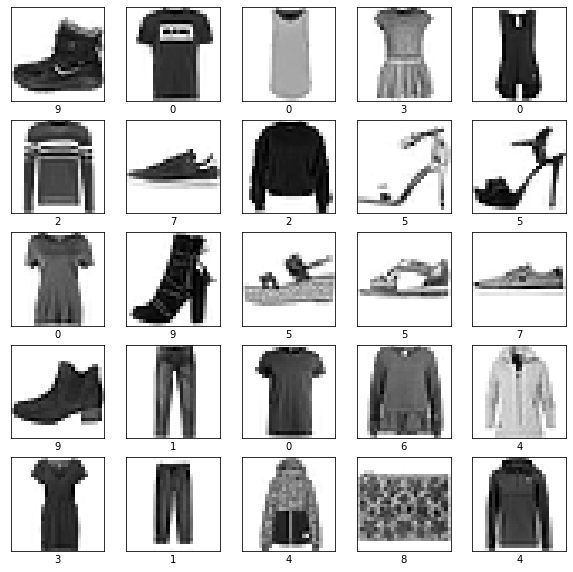

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(t_train[i])
plt.show()

**(v) 데이터의 픽셀값을 0부터 1사이로 노멀라이즈하시오.**

학습 시작전에 항상 데이터의 피처들을 최대값으로 나눠줘서 0과 1사이로 노멀라이즈 해줍니다.  
그렇지 않으면 피처, 파라미터, 하이퍼파라미터간에 밸런스가 안맞아서 학습이 제대로 진행이 안됩니다.  
실제로 노멀라이즈 하지 않고 학습을 시작하는 실험을 해보면 정확도가 10프로에서 전혀 오르지 않습니다.

In [16]:
x_train = x_train/255

x_test = x_test/255

**(vi) train_neuralnet.py를 수정하여 신경망을 훈련시킨후 정확도를 측정하시오.**

Fashion_MNIST는 여태까지 배운 딥러닝 기법만으로는 MNIST만큼의 정확도를 얻어내기 힘든 데이터셋입니다.  
다음 링크를 참조하세요.  
https://github.com/zalandoresearch/fashion-mnist

In [17]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.08525 0.0818
0.81555 0.8049
0.8336333333333333 0.8228
0.8544666666666667 0.8386
0.85565 0.8408
0.8414166666666667 0.8242
0.86585 0.8506
0.8766166666666667 0.8599
0.8773333333333333 0.8562
0.8836166666666667 0.8649
0.8779833333333333 0.8613
0.8799 0.8587
0.8810833333333333 0.8596
0.8919666666666667 0.8695
0.8874666666666666 0.8631
0.8873 0.8639
0.8960333333333333 0.8681


**(vii) 혼동 행렬(confusion matrix)을 출력하시오.**

In [18]:
confusion = np.zeros((10,10), dtype=int)

for k in range(len(x_test)):
    i=int(t_test[k])
    y = network.predict(x_test[k].reshape(1,784))
    j= np.argmax(y)
    confusion[i][j] += 1
    
print(confusion)

[[800   0  24  38   6   1 119   0  12   0]
 [  3 961   1  29   3   0   2   0   1   0]
 [ 10   1 815  14  91   0  64   0   5   0]
 [ 21   4  15 900  31   0  26   0   3   0]
 [  0   1 106  35 781   0  75   0   2   0]
 [  0   0   0   1   0 938   0  44   2  15]
 [107   1 108  38  61   0 672   0  13   0]
 [  0   0   0   0   0  19   0 967   0  14]
 [  3   0   8   6   3   4   8   5 963   0]
 [  0   0   0   0   0   9   1  67   0 923]]


**(viii) 라벨 k에 대한 precision, recall은 다음과 같이 정의한다.**
$$
\text{precision} =  {\text{k라고 예측한 데이터중 실제 라벨이 k인 데이터의 수} \over \text{k라고 예측한 데이터의 수}}
$$
$$
\text{recall} =  {\text{라벨이 k인 데이터중 k라고 예측한 데이터의 수} \over \text{라벨이 k인 데이터의 수}}
$$
**F1-score는 precision과 recall의 조화평균, 즉**
$$
{1 \over \text{F1-score}} = {1 \over 2} \left({1 \over \text{precision}} + {1 \over \text{recall}} \right)
$$
**으로 정의한다.
각 라벨에 대하여 precision, recall, F1-score를 출력하시오.**

In [19]:
class_names=['Tshirt/top','Troser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

for i in range(10):
    precision = confusion[i,i]/np.sum(confusion[:,i])
    recall = confusion[i,i]/np.sum(confusion[i,:])
    F1_score = 2*(precision*recall) / (precision+recall)
    print(class_names[i]+" : "+str(precision.round(2))+",  "+str(recall.round(2))+",  "+str(F1_score.round(2)))

Tshirt/top : 0.85,  0.8,  0.82
Troser : 0.99,  0.96,  0.98
Pullover : 0.76,  0.82,  0.78
Dress : 0.85,  0.9,  0.87
Coat : 0.8,  0.78,  0.79
Sandal : 0.97,  0.94,  0.95
Shirt : 0.69,  0.67,  0.68
Sneaker : 0.89,  0.97,  0.93
Bag : 0.96,  0.96,  0.96
Ankle boot : 0.97,  0.92,  0.95


**7.(i) 자료실에서 cifar10.pkl 파일을 다운받은 후 불러와서 출력하시오.**

역시 딕셔너리가 저장되어 있네요.

In [20]:
with open('cifar10.pkl','rb') as f:
    cifar10 = pickle.load(f)

print(cifar10)

{'x_train': array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 14

**(ii) key들을 모두 출력하고 value들의 shape을 출력하시오.**

컬러 이미지를 표현하는 3차원 텐서형식은 두가지 스탠다드가 있습니다.  
Channel $\times$  Height $\times$ Width와 Height $\times$ Width $\times$ Channel입니다.  
우리 교재는 전자를 따르는데 불러들인 데이터셋은  후자를 따르네요.  
다음 문제에서 사용할 `plt.imshow`는 후자를 따릅니다.
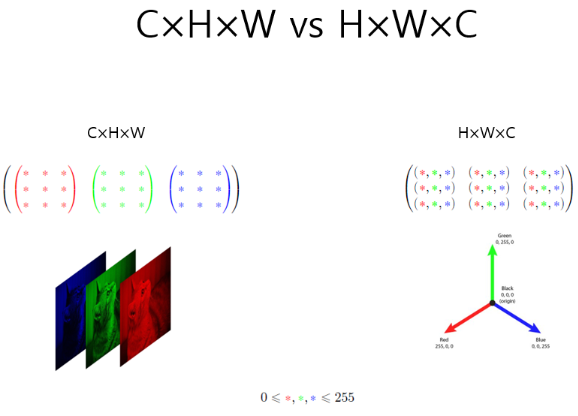

In [21]:
print(cifar10.keys())

for data in cifar10.values():
    print(data.shape)

dict_keys(['x_train', 't_train', 'x_test', 't_test'])
(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


**(iii) 훈련데이터 첫 25장의 이미지를 다음과 같이 출력하시오.**
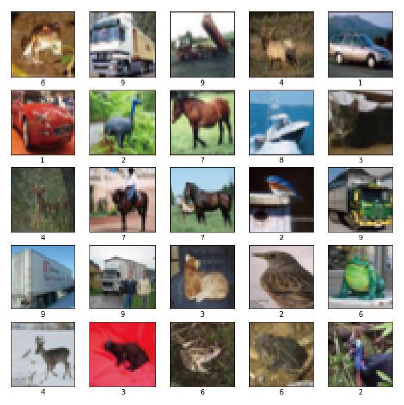

cifar10은 32$\times$32 해상도의 컬러 이미지 데이터셋으로 훈련용 50,000장과 테스트용 10,000장으로 이루어져있습니다.  
0부터 9까지의 각 레벨은 다음과 같은 사물들을 나타냅니다.
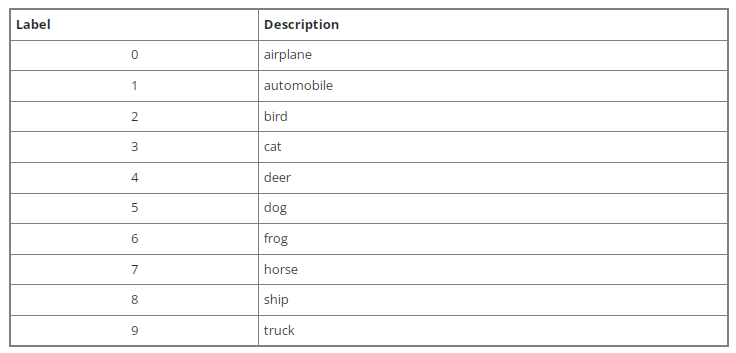

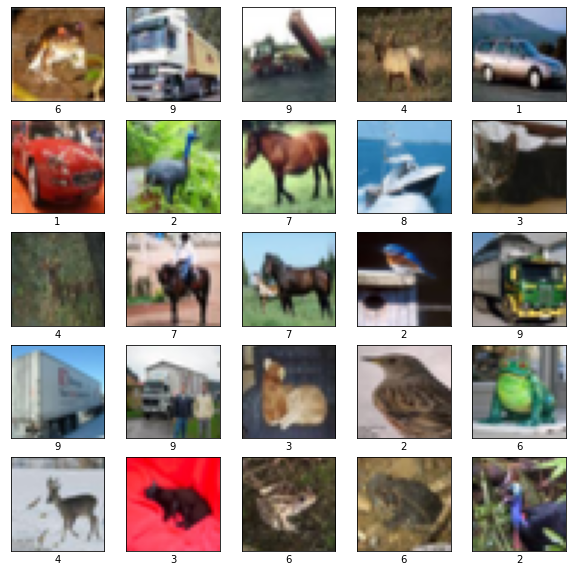

In [22]:
x_train = cifar10['x_train']
t_train = cifar10['t_train']
x_test = cifar10['x_test']
t_test = cifar10['t_test']


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(t_train[i])
plt.show()

**(iv) 데이터의 픽셀값을 0부터 1사이로 노멀라이즈하시오.**

In [23]:
x_train = x_train/255

x_test = x_test/255

**(v) train_neuralnet.py를 수정하여 신경망을 훈련시킨후 정확도를 측정하시오.**

신경망이 분류하기 훨씬 어려운 이미지 데이터셋이네요.  
다음 링크를 참고하세요.  
https://www.cs.toronto.edu/~kriz/cifar.html

In [24]:
network = TwoLayerNet(input_size=32*32*3, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.1184 0.12
0.33708 0.334
0.39786 0.3955
0.3818 0.3793
0.4274 0.4193
0.42306 0.4149
0.4358 0.4217
0.4585 0.4463
0.45728 0.4426
0.468 0.4555
0.46068 0.4456
0.47452 0.4532
0.4687 0.4436
0.48162 0.4538
0.48054 0.4543
0.50132 0.4671
0.49628 0.4654
0.49118 0.4571
0.49396 0.4577
0.48936 0.454


**(vi) 자료실에서 cifar100.pkl 파일을 다운받은 후 같은 작업을 하시오.**

In [25]:
with open('cifar100.pkl','rb') as f:
    cifar100 = pickle.load(f)

print(cifar100)

{'x_train': array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  1

In [26]:
print(cifar100.keys())

for data in cifar100.values():
    print(data.shape)

dict_keys(['x_train', 't_train', 'x_test', 't_test'])
(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


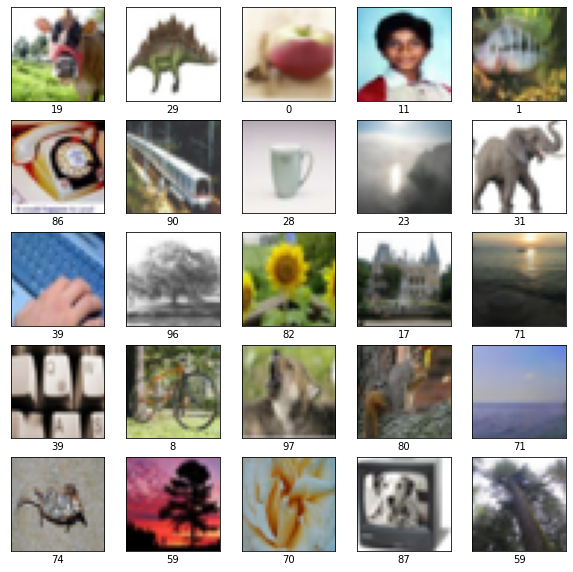

In [27]:
x_train = cifar100['x_train']
t_train = cifar100['t_train']
x_test = cifar100['x_test']
t_test = cifar100['t_test']


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(t_train[i])
plt.show()

In [28]:
x_train = x_train/255

x_test = x_test/255

라벨이 0부터 99까지의 정수로 이루어져있습니다.  
100진 분류 문제이므로 출력 뉴런의 개수를 100으로 잡습니다.

In [29]:
network = TwoLayerNet(input_size=32*32*3, hidden_size=50, output_size=100)

100진 분류문제이므로 학습시작전에는 정확도가 대략 1프로정도가 나옵니다.  
최종정확도가 19프로정도밖에 나오지 않네요.  
하지만 MNIST는 10프로에서 97프로까지 9.7배의 정확도 상승이지만 cifar100은 1프로에서 20프로까지 20배의 상승입니다.  
물론 단순비교는 적절치 않습니다.  
정확도가 높아질수록 약간의 정확도를 높이는 것조차 매우 어려운 일이기 때문입니다.  
CNN을 배우면 얕은 층만으로도 MNIST의 정확도를 99프로까지 올릴수 있고 심층 CNN을 구성하면 99.3프로까지 올릴수 있습니다.  
99프로가 넘어가서 0.1프로 올릴려면 많은 테크니컬한 작업을 해야 합니다.

In [30]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.01198 0.012
0.08144 0.0814
0.11662 0.1135
0.13492 0.1342
0.1433 0.1374
0.15532 0.1468
0.16934 0.157
0.18142 0.172
0.177 0.1619
0.17972 0.1646
0.19744 0.1816
0.19468 0.1789
0.19696 0.1761
0.19074 0.1692
0.2121 0.1933
0.2078 0.1822
0.22114 0.1953
0.22232 0.2041
0.2155 0.1877
0.21474 0.1832


**8.(i) MINST 테스트 데이터 이미지를 오른쪽으로 $k$ 픽셀만큼, 위로 $k$ 픽셀만큼 이동시킨 후 첫 25장의 이미지를  다음과 같이  출력하시오. ($k$=1,2,3)**
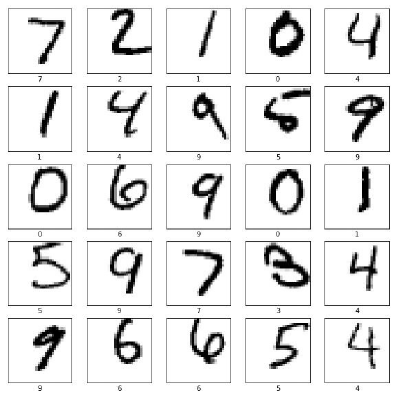

먼저 테스트 데이터와 형식이 같은 0으로 채워진 깡통 4차원 텐서를 만듭니다.  
테스트 데이터의 왼쪽 아래 부분을 떼어 내서 깡통 이미지의 오른쪽 위에 붙여 넣습니다.  
몇번째 데이터인지와 채널을 나타내는 부분은 수정하지 않으므로 : 으로 놓습니다.  
왼쪽 아래는 세로가 k:, 가로가 :28-k입니다.  
오른쪽 위는 세로가 :28-k, 가로가 k:입니다.
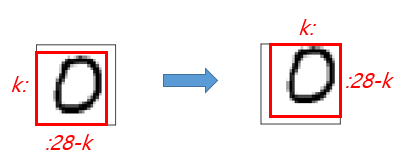

==========평행이동시킨 픽셀 : 1==========


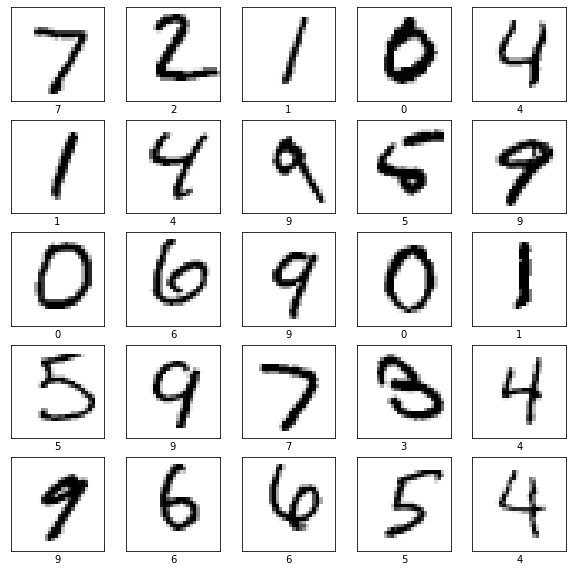

==========평행이동시킨 픽셀 : 2==========


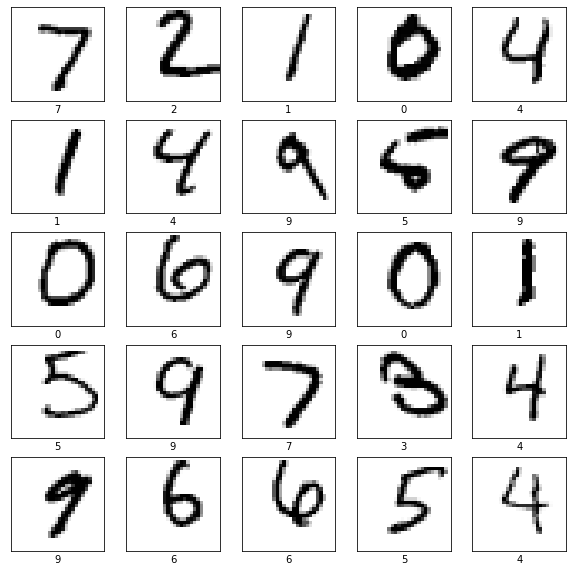

==========평행이동시킨 픽셀 : 3==========


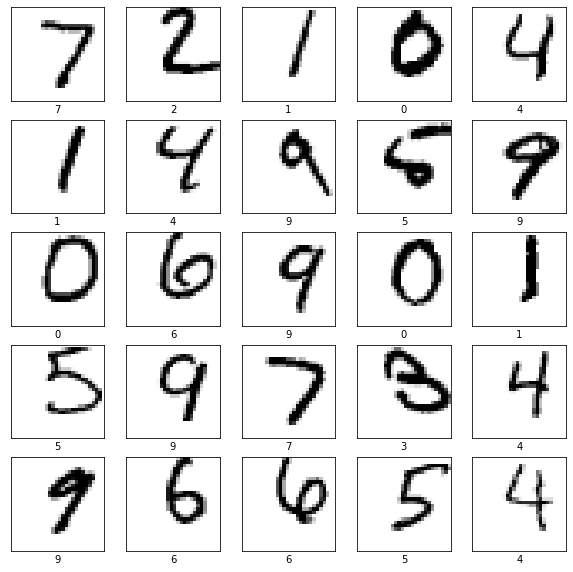

In [31]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=True)

for k in [1,2,3]:
    print("="*10+"평행이동시킨 픽셀 : "+str(k)+"="*10)
    x=np.zeros((10000,1,28,28))
    x[:,:,:28-k,k:] = x_test[:,:,k:,:28-k]
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x[i][0], cmap=plt.cm.binary)
        plt.xlabel(t_test[i])
    plt.show()

**(ii) neuralnet.pkl에 저장된 가중치 행렬과 편향벡터를 사용하여 평행이동 시킨 데이터들에 대하여 정확도를 측정하시오. 평행이동했을 뿐인데 정확도가 떨어진 이유를 설명하시오.**

우리는 이미지를 로컬하게 이해합니다.  
다시말해, 각 픽셀의 주변 픽셀과의 관계가 이미지를 이해하는 핵심적인 요소입니다.  
로컬한 정보는 평행이동, 회전, 확대, 축소등에 의해 변하지 않습니다.  
그래서 우리는 이미지 데이터를 평행이동, 회전, 확대, 축소한 후에도 동일한 이미지라고 인식합니다.

이미지 데이터가 신경망에 입력되기 전에 flatten과정을 거칩니다.  
이는 마치 사진을 세절기에 넣은 후 옆으로 이어붙이는 과정과 같습니다.  
flatten 과정에서 로컬한 정보는 사라집니다.  
우리가 여태까지 공부한 신경망은 이미지의 로컬한 정보를 이해하지 못합니다.  
따라서 평행이동한 이미지를 원 이미지와 동일한 이미지라고 생각하지 않습니다.
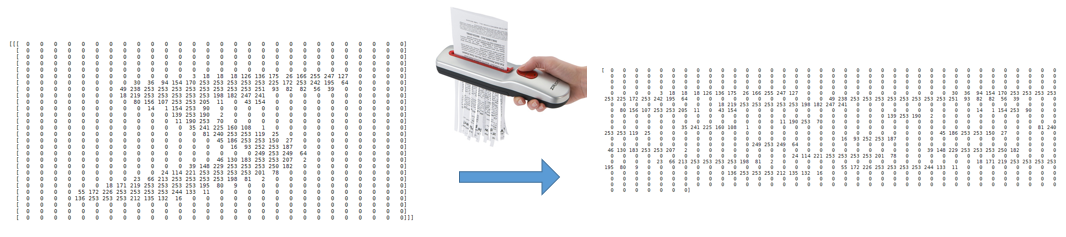

In [32]:
from common.functions import relu

def init_network():
    with open("neuralnet.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    a1 = np.dot(x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2

    return a2

network = init_network()

for k in [1,2,3]:
    print("="*10+"평행이동시킨 픽셀 : "+str(k)+"="*10)
    x=np.zeros((10000,1,28,28))
    x[:,:,:28-k,k:] = x_test[:,:,k:,:28-k]
    y = predict(network,x.reshape(10000,784))
    p = np.argmax(y,axis=1)
    accuracy = np.mean(p == t_test)
    print(accuracy)

==========평행이동시킨 픽셀 : 1==========
0.9139
==========평행이동시킨 픽셀 : 2==========
0.6206
==========평행이동시킨 픽셀 : 3==========
0.2494
